# OK Cupid Profiles Analysis

This notebook contains the data cleaning and initial analysis of a dataset that compiles information from OK Cupid user profiles. All visualizations were made for information purposes. Final presentation will be created in Tableau.

### Problem Statement: What details can be gleaned from this sample of OK Cupid profiles that can be used to inform marketing targets for represented and underrepresented demographics?

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [61]:
df = pd.read_csv('Ok Cupid Profiles.csv')

Clean the data - add and remove columns, filter rows

In [62]:
#counting languages
df['speaks'] = df["speaks"].astype(str)
df['num_languages'] = df.speaks.str.strip().str.split(',').apply(len)
#counting ethnicity
df['ethnicity'] = df["ethnicity"].astype(str)
df['num_ethnicity'] = df.ethnicity.str.strip().str.split(',').apply(len)

#splitting city/state
df['city'] = df.location.str.split(',', expand = True)[0]
df['state'] = df.location.str.split(',', expand = True)[1]
#splitting religion_name + religion_description
df[['rel_name', 'rel_description']] = df['religion'].str.split(' ', 1, expand=True)
df['rel_description'] = df['rel_description'].str.lstrip('and ')
df['rel_description'] = df['rel_description'].str.lstrip('but ')
#splitting sign_name + sign_description
df[['sign_name', 'sign_description']] = df['sign'].str.split(' ', 1, expand=True)
df['sign_description'] = df['sign_description'].str.lstrip('and ')
df['sign_description'] = df['sign_description'].str.lstrip('but ')

#remove space from state
df.state = df.state.str.lstrip()

#create country column that contains country labels
def countries(df):
    if (df['state'] == 'mexico') or (df['state'] == 'switzerland') \
    or (df['state'] == 'netherlands') or (df['state'] == 'germany') or (df['state'] == 'british columbia')\
    or (df['state'] == 'united kingdom') or (df['state'] == 'ireland') or (df['state'] == 'vietnam')\
    or (df['state'] == 'spain'):
        return df['state']
    else:
        return 'usa'
df['country'] = df.apply(countries, axis=1)

#drop all rows that are not in usa --> rationale: there are very few (<20) non-usa entries
df = df[df.country == 'usa']

#drop all rows that are not in california --> rationale: there are very few (<20) non-usa entries
df = df[df.state == 'california']

#replace all "None" with NaN for uniformity
df.fillna(value=pd.np.nan, inplace=True)

#drop columns --> rationale: essay and income columns did not have quantifiable information,  
#                 last_online, country, and state column information was not useful or redundant
df = df.drop(columns=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',\
                      'income', 'last_online', 'country', 'state'])

#individual race/ethnicity columns
#white
def white(df):
    if ('white' in df['ethnicity']):
        return 1
    else:
        return 0
df['white'] = df.apply(white, axis=1)
#asian
def asian(df):
    if ('asian' in df['ethnicity']):
        return 1
    else:
        return 0
df['asian'] = df.apply(asian, axis=1)
#black
def black(df):
    if ('black' in df['ethnicity']):
        return 1
    else:
        return 0
df['black'] = df.apply(black, axis=1)
#hispanic/latin
def hispanic(df):
    if ('hispanic / latin' in df['ethnicity']):
        return 1
    else:
        return 0
df['hispanic/latin'] = df.apply(hispanic, axis=1)
#native american
def native_american(df):
    if ('native american' in df['ethnicity']):
        return 1
    else:
        return 0
df['native_american'] = df.apply(native_american, axis=1)
#middle eastern
def middle_eastern(df):
    if ('middle eastern' in df['ethnicity']):
        return 1
    else:
        return 0
df['middle_eastern'] = df.apply(middle_eastern, axis=1)
#indian
def indian(df):
    if ('indian' in df['ethnicity']):
        return 1
    else:
        return 0
df['indian'] = df.apply(indian, axis=1)
#pacific islander
def pacific_islander(df):
    if ('pacific islander' in df['ethnicity']):
        return 1
    else:
        return 0
df['pacific_islander'] = df.apply(pacific_islander, axis=1)
#other
def other(df):
    if ('other' in df['ethnicity']):
        return 1
    else:
        return 0
df['other'] = df.apply(other, axis=1)

#new race/ethinicty column
def race_ethnicity(df):
    if (df['white'] + df['asian']) > 1:
        return 'Two or More'
    elif df['white'] == 1:
        return 'white'
    elif df['asian'] == 1:
        return 'asian'
    elif df['black'] == 1:
        return 'black'
    elif df['hispanic/latin'] == 1:
        return 'hispanic/latin'
    elif df['native_american'] == 1:
        return 'native american'
    elif df['middle_eastern'] == 1:
        return 'middle eastern'
    elif df['indian'] == 1:
        return 'indian'
    elif df['pacific_islander'] == 1:
        return 'pacific islander'
    elif df['other'] == 1:
        return 'other'
    else:
        return 'NaN'
df['race_ethnicity'] = df.apply(race_ethnicity, axis=1)

#pets
df['pets'] = df["pets"].astype(str)

def has_pets(df):
    if 'has dogs' in df['pets']:
        return 'has dogs'
    elif 'has cats' in df['pets']:
        return 'has cats'
    elif ('has dogs' in df['pets']) and ('has cats' in df['pets']):
        return 'has both dogs and has cats'
    elif 'nan' in df['pets']:
        return 'No Response'
    else:
        return 'does not have pets'
df['has_pets'] = df.apply(has_pets, axis=1)

def likes_pets(df):
    if ('likes dogs' in df['pets']) and ('likes cats' in df['pets']):
        return 'likes both dogs and cats'
    elif ('dislikes dogs' in df['pets']) and ('dislikes cats' in df['pets']):
        return 'dislikes both dogs and cats'
    elif ('likes dogs' in df['pets']) and ('dislikes cats' in df['pets']):
        return 'likes dogs and dislikes cats'
    elif ('dislikes dogs' in df['pets']) and ('likes cats' in df['pets']):
        return 'dislikes dogs and likes cats'
    elif 'likes cats' in df['pets']:
        return 'likes cats'
    elif 'likes dogs' in df['pets']:
        return 'likes dogs'
    else:
        return 'No Response'
df['likes_pets'] = df.apply(likes_pets, axis=1)

#kids
df['offspring'] = df["offspring"].astype(str)

#has kids
def has_kids(df):    
    if 'has a kid' in df['offspring']:
        return 'has a kid'
    elif 'has kids' in df['offspring']:
        return 'has kids'
    elif 'nan' in df['offspring']:
        return 'No Response'
    else:
        return 'does not have kids'
df['has_kids'] = df.apply(has_kids, axis=1)
df3 = df[['offspring', 'has_kids']]

#wants kids
def wants_kids(df):    
    if ('wants kids' in df['offspring']) or ('wants them' in df['offspring']):
        return 'wants kids'
    elif ('might want kids' in df['offspring']) or ('might want them' in df['offspring']):
        return 'might want kids'
    elif ('doesn&rsquo;t want kids' in df['offspring']) or ('doesn&rsquo;t want any' in df['offspring']):
        return 'does not want kids'
    elif ('wants more' in df['offspring']):
        return 'wants more'
    elif ('might want more' in df['offspring']):
        return 'might want more'
    elif ('doesn&rsquo;t want more' in df['offspring']):
        return 'does not want more'
    else:
        return 'No Response'
df['wants_kids'] = df.apply(wants_kids, axis=1)

print(df.info(), df.describe())

<ipython-input-62-32498fb0c1a9>:41: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.fillna(value=pd.np.nan, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59855 entries, 0 to 59945
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               59855 non-null  int64  
 1   body_type         54566 non-null  object 
 2   diet              35495 non-null  object 
 3   drinks            56875 non-null  object 
 4   drugs             45798 non-null  object 
 5   education         53236 non-null  object 
 6   ethnicity         59855 non-null  object 
 7   height            59853 non-null  float64
 8   job               51673 non-null  object 
 9   location          59855 non-null  object 
 10  offspring         59855 non-null  object 
 11  orientation       59855 non-null  object 
 12  pets              59855 non-null  object 
 13  religion          39663 non-null  object 
 14  sex               59855 non-null  object 
 15  sign              48818 non-null  object 
 16  smokes            54350 non-null  object

## Demographics Analysis

### Age

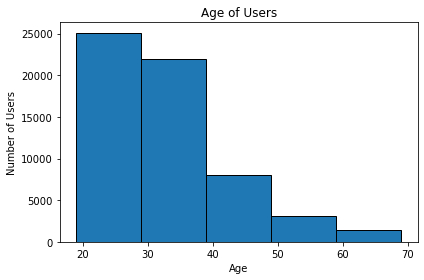

In [84]:
#remove ages greater than or equal to 100
df = df[df['age'] < 100]
df = df[df['age'] > 18]
#plot histogram of age distribution
plt.hist(df['age'], bins = 5, edgecolor='black')

plt.title('Age of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

Observation: It looks like the majority of users are between 20 and 40 years old.

### Gender

In [77]:
sex_percentage = df['sex'].value_counts(normalize=True)*100
print('Percentage of Male and Female Users')
print(sex_percentage)

Percentage of Male and Female Users
m    59.758074
f    40.241926
Name: sex, dtype: float64


Text(0.5, 1.0, 'Number of Male and Female Users')

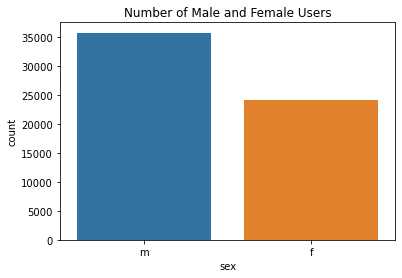

In [78]:
sns.countplot(x='sex', data = df)
plt.title('Number of Male and Female Users')

Observation: There are more male users than female users.

Text(0.5, 0.98, 'Age Distribution by Gender')

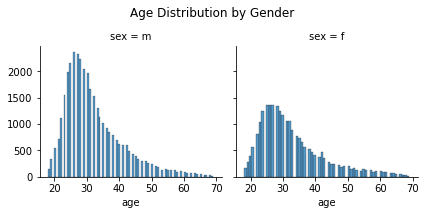

In [79]:
sex_age = sns.FacetGrid(df, col="sex")
sex_age.map(sns.histplot, "age")
sex_age.fig.subplots_adjust(top = 0.8)
sex_age.fig.suptitle('Age Distribution by Gender')

Observation: The age distribution is the same for male and female

### Sexual Orientation

Index(['straight', 'gay', 'bisexual'], dtype='object')


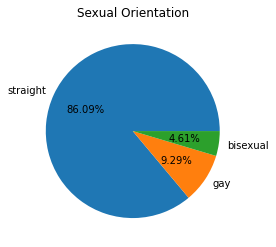

In [80]:
orientation_count = df['orientation'].value_counts()
orientation_label = df['orientation'].value_counts().index
print(orientation_label)
plt.pie(orientation_count, labels = orientation_label, autopct = '%1.2f%%')
plt.title('Sexual Orientation')
plt.show()

Observation: The majority of this sample identifies as straight.

### Family Status

Text(0.5, 1.0, 'Has Kids')

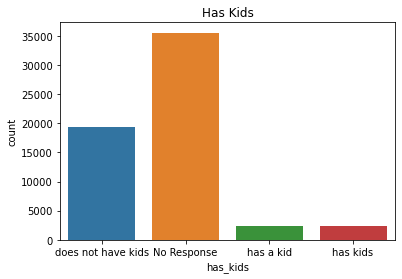

In [81]:
sns.countplot(x='has_kids', data = df)
plt.title('Has Kids')

Observation: The majority of the users did not respond to this question. To visualize the distribution of the responses for users that did respond, all "No Response" values will be filtered below.

Index(['does not have kids', 'has kids', 'has a kid'], dtype='object')


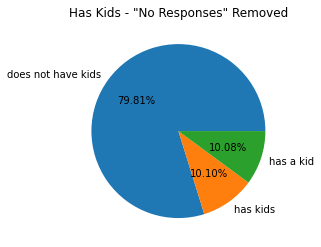

In [183]:
#Filter out "No Response"
df2 = df[df['has_kids'] != 'No Response']

has_kids_count = df2['has_kids'].value_counts()
has_kids_label = df2['has_kids'].value_counts().index
print(has_kids_label)
plt.pie(has_kids_count, labels = has_kids_label, autopct = '%1.2f%%')
plt.title('Has Kids - "No Responses" Removed')
plt.show()

Text(0.5, 1.0, 'Wants Kids')

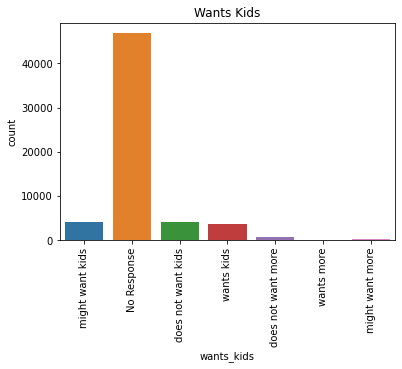

In [185]:
sns.countplot(x='wants_kids', data = df)
plt.xticks(rotation=90)
plt.title('Wants Kids')

Observation: Again, most users did not respond. See below for distribution with "No Response" filtered out.

Text(0.5, 1.0, 'Wants Kids - "No Responses" Removed')

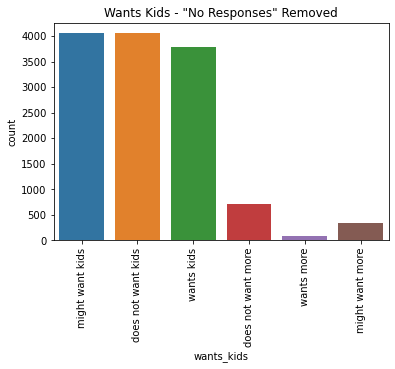

In [186]:
df3 = df[df['wants_kids'] != 'No Response']

sns.countplot(x='wants_kids', data = df3)
plt.xticks(rotation=90)
plt.title('Wants Kids - "No Responses" Removed')

Text(0.5, 1.0, 'Has Kids - "No Responses" Removed')

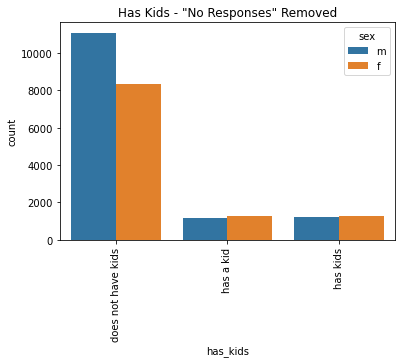

In [201]:
sns.countplot(x=df2['has_kids'], hue=df2['sex'], data=pd.melt(df2))
plt.xticks(rotation=90)
plt.title('Has Kids - "No Responses" Removed')

Text(0.5, 1.0, 'Wants Kids - "No Responses" Removed')

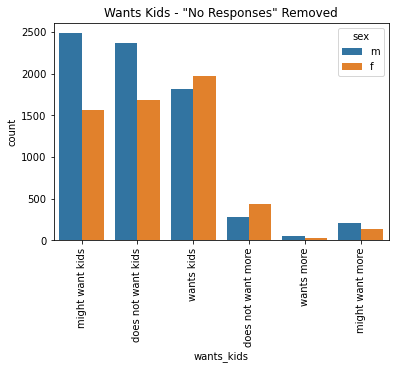

In [202]:
sns.countplot(x=df3['wants_kids'], hue=df3['sex'], data=pd.melt(df3))
plt.xticks(rotation=90)
plt.title('Wants Kids - "No Responses" Removed')

Observation: When categorized by gender, there are more females that have kids, want kids, and don't want more kids than males.

### Status

In [67]:
status_percentage = df['status'].value_counts(normalize=True)*100
print("Percent of Users by Status")
print(status_percentage)

Percent of Users by Status
single            92.914543
seeing someone     3.441651
available          3.109181
married            0.517918
unknown            0.016707
Name: status, dtype: float64


Observation: The majority of the sample set status to single.

### Education Level

In [68]:
education_percentage = df['education'].value_counts(normalize=True)*100
print("Percent of Users by Education Level")
print(education_percentage)

Percent of Users by Education Level
graduated from college/university    44.947028
graduated from masters program       16.813810
working on college/university        10.710797
working on masters program            3.148246
graduated from two-year college       2.868360
graduated from high school            2.678639
graduated from ph.d program           2.383725
graduated from law school             2.101961
working on two-year college           2.013675
dropped out of college/university     1.869036
working on ph.d program               1.844616
college/university                    1.502743
graduated from space camp             1.234127
dropped out of space camp             0.978661
graduated from med school             0.837779
working on space camp                 0.830265
working on law school                 0.501540
two-year college                      0.417011
working on med school                 0.398227
dropped out of two-year college       0.358780
dropped out of masters p

Observation: 44% of users gradated from college/university.

### Occupation

In [69]:
occupation_percentage = df['job'].value_counts(normalize=True)*100
print("Percent of Users by Occupation")
print(occupation_percentage)

Percent of Users by Occupation
other                                14.661429
student                               9.432392
science / tech / engineering          9.368529
computer / hardware / software        9.091789
artistic / musical / writer           8.573143
sales / marketing / biz dev           8.489927
medicine / health                     7.113967
education / academia                  6.783039
executive / management                4.590405
banking / financial / real estate     4.383334
entertainment / media                 4.348499
law / legal services                  2.670640
hospitality / travel                  2.637741
construction / craftsmanship          1.975887
clerical / administrative             1.557874
political / government                1.362414
rather not say                        0.843768
transportation                        0.708300
unemployed                            0.528322
retired                               0.483812
military                     

Observation: The majority of the users listed "Other" as their job title. The next biggest categories are student, science/tech/engineering, and computer/hardware/softare.

### Race/Ethnicity

Text(0.5, 1.0, 'Race/Ethnicity')

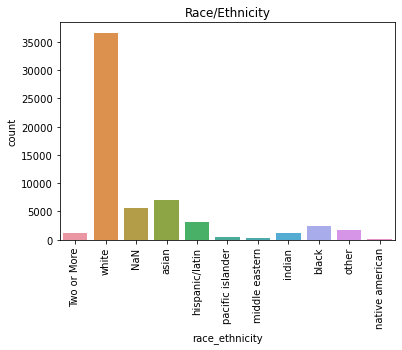

In [212]:
sns.countplot(x='race_ethnicity', data = df)
plt.xticks(rotation=90)
plt.title('Race/Ethnicity')

Observation: The majority of the users are white.

### Body Type

Text(0.5, 1.0, 'Body Type')

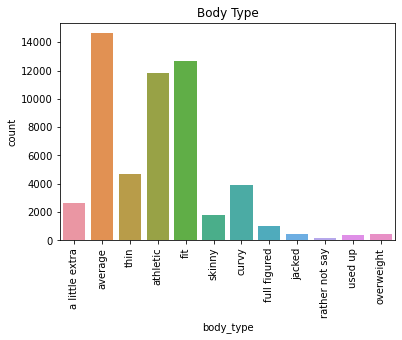

In [217]:
sns.countplot(x='body_type', data = df)
plt.xticks(rotation=90)
plt.title('Body Type')

Observation: The majority of the users listed their body type as average, fit, or athletic.

## Physical Traits

### Body Type

Text(0.5, 1.0, 'Wants Kids - "No Responses" Removed')

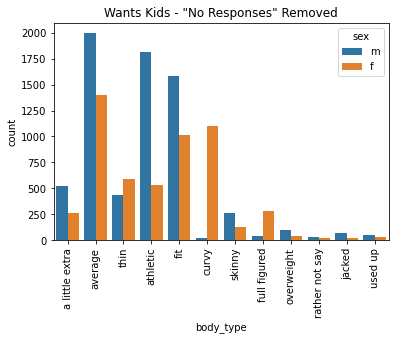

In [219]:
sns.countplot(x=df3['body_type'], hue=df3['sex'], data=pd.melt(df3))
plt.xticks(rotation=90)
plt.title('Wants Kids - "No Responses" Removed')

Observation: More women identified as thin, curvy, or full figured than men.

### Height

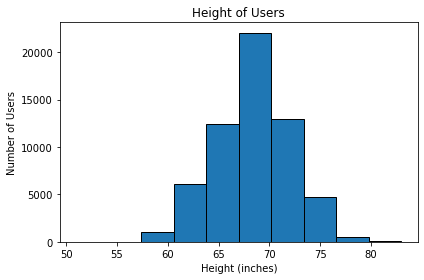

In [231]:
#remove ages greater than or equal to 100
df = df[df['height'] >= 50]
df = df[df['height'] <= 85]
#plot histogram of age distribution
plt.hist(df['height'], bins = 10, edgecolor='black')

plt.title('Height of Users')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

Observation: Most users are between 65 and 75 inches tall.

## Lifestyle Habits/Preferences

## Diet

In [70]:
diet_percentage = df['diet'].value_counts(normalize=True)*100
print("Percent of Users by Dietary Preferences")
print(diet_percentage)

Percent of Users by Dietary Preferences
mostly anything        46.660093
anything               17.393999
strictly anything      14.387942
mostly vegetarian       9.685871
mostly other            2.828567
strictly vegetarian     2.462319
vegetarian              1.873503
strictly other          1.267784
mostly vegan            0.943795
other                   0.932526
strictly vegan          0.639527
vegan                   0.383153
mostly kosher           0.242288
mostly halal            0.135230
strictly halal          0.050711
strictly kosher         0.050711
halal                   0.030990
kosher                  0.030990
Name: diet, dtype: float64


Observation: Most users chose "mostly anything" to identify their diet

### Alcohol Consumption

Text(0.5, 1.0, 'Alcohol Consumption Responses')

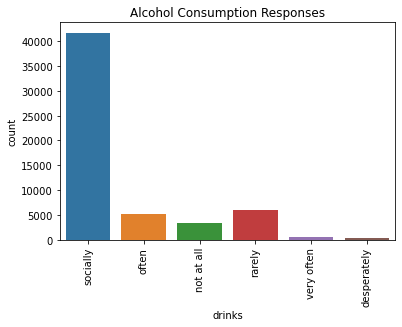

In [7]:
sns.countplot(x='drinks', data = df)
plt.xticks(rotation=90)
plt.title('Alcohol Consumption Responses')

Text(0.5, 1.0, 'Alcohol - Male and Female')

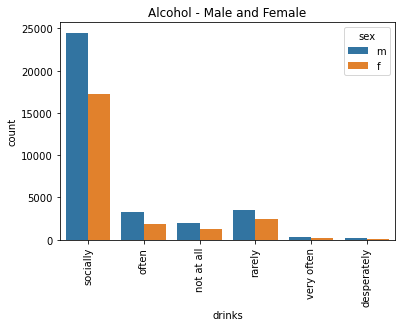

In [13]:
sns.countplot(x=df['drinks'], hue=df['sex'], data=pd.melt(df3))
plt.xticks(rotation=90)
plt.title('Alcohol - Male and Female')

Observation: Most users drink socially.

### Smoking

Text(0.5, 1.0, 'Smoking Habits')

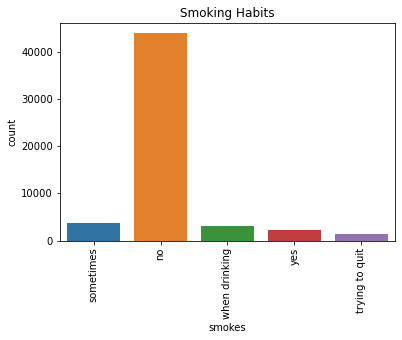

In [28]:
sns.countplot(x='smokes', data = df)
plt.xticks(rotation=90)
plt.title('Smoking Habits')

Text(0.5, 1.0, 'Smoking Habits - Male and Female')

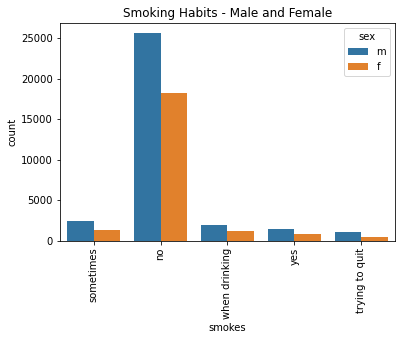

In [29]:
sns.countplot(x=df['smokes'], hue=df['sex'], data=pd.melt(df3))
plt.xticks(rotation=90)
plt.title('Smoking Habits - Male and Female')

Observation: The majority of users do not smoke.

### Pets

Text(0.5, 1.0, 'Pet Owners')

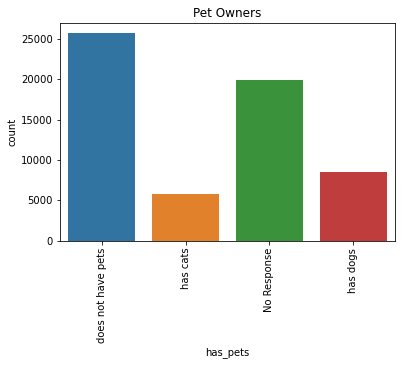

In [25]:
sns.countplot(x='has_pets', data = df)
plt.xticks(rotation=90)
plt.title('Pet Owners')

Observation: The majority of users do not have pets or did not respond.

### Feelings About Pets

Text(0.5, 1.0, 'User Feelings About Pets')

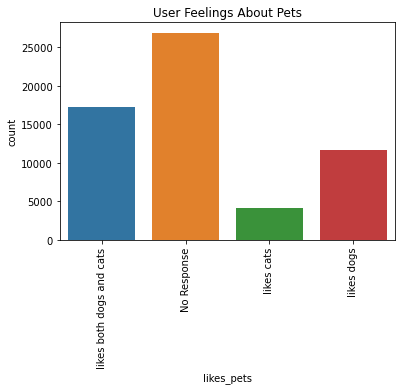

In [27]:
sns.countplot(x='likes_pets', data = df)
plt.xticks(rotation=90)
plt.title('User Feelings About Pets')

Observation: Most users did not include their feelings about pets in their response. Of those users that did, most of them like dogs and cats

## Belief System

### Religion

In [73]:
religion_percentage = df['rel_name'].value_counts(normalize=True)*100
print("Percent of Users by Religious Affiliation")
print(religion_percentage)

Percent of Users by Religious Affiliation
agnosticism     22.189446
other           19.494239
atheism         17.575574
christianity    14.580339
catholicism     11.980939
judaism          7.798200
buddhism         4.898772
hinduism         1.132037
islam            0.350453
Name: rel_name, dtype: float64


In [72]:
print("Percent of Users by Religious Affiliation and Sentiment")
df.groupby(['rel_name', 'rel_description']).size().unstack(fill_value=0).apply(lambda x: 100 * x / float(x.sum()))

Percent of Users by Religious Affiliation and Sentiment


rel_description,laughing about it,not too serious about it,somewhat serious about it,very serious about it
rel_name,,,,
agnosticism,27.751196,21.586156,14.247670,14.188884
atheism,23.033270,10.784877,18.797159,25.666516
buddhism,5.185268,5.314525,7.922770,3.163127
catholicism,8.067208,18.978102,12.139370,4.609128
christianity,4.139312,16.009186,20.505992,26.118391
hinduism,0.489596,1.853523,1.287173,0.632625
islam,0.178035,0.328057,0.488238,0.587438
judaism,7.577612,12.408759,5.903240,0.994126
other,23.578502,12.736816,18.708389,24.039765


Percentages listed above identify user sentiment about their religious beliefs. The numbers in the table are percentages. 
Observation: It may be more useful to find the percent of the row. This can be done more easily in Tableau.

### Zodiac Sign

In [74]:
sign_name_percentage = df['sign_name'].value_counts(normalize=True)*100
print("Percent of Users by Zodiac Sign")
print(sign_name_percentage)

Percent of Users by Zodiac Sign
leo            8.945471
gemini         8.818469
libra          8.605432
cancer         8.603384
virgo          8.474333
taurus         8.472285
scorpio        8.453849
aries          8.152731
pisces         8.068745
sagittarius    8.062600
aquarius       8.035970
capricorn      7.306731
Name: sign_name, dtype: float64


Observation: There is an even distribution of signs represented in the users.

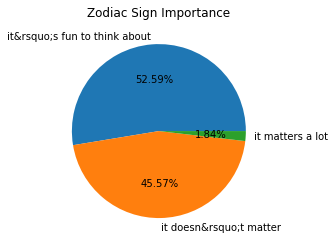

In [63]:
sign_description_count = df['sign_description'].value_counts()
sign_description_label = df['sign_description'].value_counts().index
plt.pie(sign_description_count, labels = sign_description_label, autopct = '%1.2f%%')
plt.title('Zodiac Sign Importance')
plt.show()

Observation: Most users think their zodiac sign is "fun to think about" or "doesn't matter"

## Notes and Observations
* When comparing responses by gender, it may be useful to normalize the data since there are more males than females in this sample.
* For this analysis, comparing the demographics of the users to the total state demographics would provide more insight for marketing than exploring correlations between variables.